In [1]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from scipy.optimize import curve_fit

### 2.1.1 Basic Monte Carlo Integration

Calcolare il seguente integrale con una quadratura Monte Carlo, come nel primo esercizio:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
$$\simeq G_N = \frac{1}{N} \sum_{i=1}^N g(x_i)$$

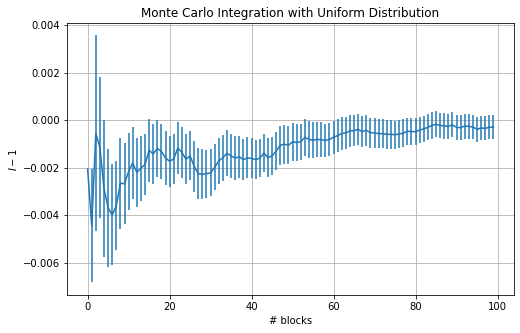

(0.99971, 0.000501266)

In [2]:
datafile = "./data/basic_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Monte Carlo Integration with Uniform Distribution")
# plt.savefig('./figures/2.1.1.png')
plt.show()

I[99], err[99]

### 2.1.2 Importance Sampling

Se campioniamo da una distribuzione più simile alla nostra integranda ci aspettiamo una convergenza più rapida.

$I \simeq G_N = \frac{1}{N} \sum_{i=1}^N \frac{g(x_i)}{d(x_i)},$ con $x_i$ da $d(x)$.

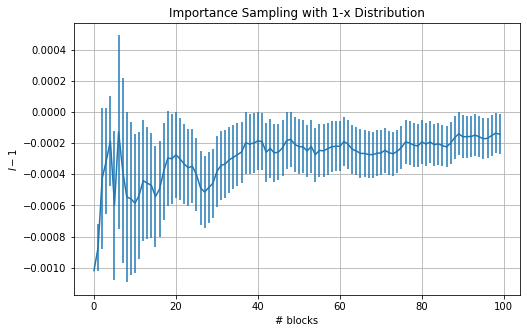

(0.999857, 0.000128057)

In [3]:
datafile = "./data/importance_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Importance Sampling with 1-x Distribution")
# plt.savefig('./figures/2.1.2.png')
plt.show()

I[99], err[99]

### 2.1.3 "Un-Importance" Sampling

Qui ho provato di trovare una distribuzione differente dall'integranda.

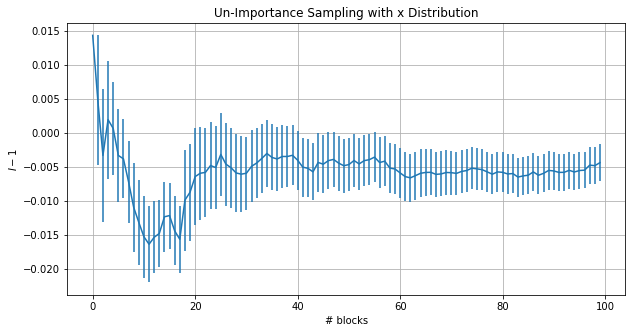

(0.995579, 0.00270755)

In [4]:
datafile = "./data/unimportance_sampling.dat"
I, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

N = 100  # Blocks

x = np.arange(N)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, I - 1, yerr=err)

plt.xlabel("# blocks")
plt.ylabel(r"$I- 1 $ ")
plt.title("Un-Importance Sampling with x Distribution")
# plt.savefig('./figures/2.1.3.png')
plt.show()

I[99], err[99]

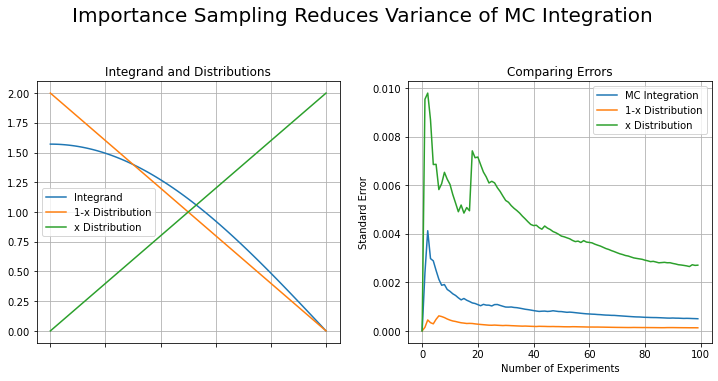

(0.000501266, 0.000128057, 0.00270755)

In [5]:
datafile = "./data/basic_sampling.dat"
err_MC = np.loadtxt(datafile, usecols=(2), delimiter=" ", unpack="true")

datafile = "./data/importance_sampling.dat"
err_IS = np.loadtxt(datafile, usecols=(2), delimiter=" ", unpack="true")

datafile = "./data/unimportance_sampling.dat"
err_US = np.loadtxt(datafile, usecols=(2), delimiter=" ", unpack="true")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(
    "Importance Sampling Reduces Variance of MC Integration", fontsize=20, y=1.05
)

x = np.arange(N)
axes[1].title.set_text("Comparing Errors")
axes[1].plot(x, err_MC, label="MC Integration")
axes[1].plot(x, err_IS, label="1-x Distribution")
axes[1].plot(x, err_US, label="x Distribution")
axes[1].set_ylabel("Standard Error")
axes[1].set_xlabel("Number of Experiments")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()

x = np.linspace(0, 1, 100)
y1 = (np.pi / 2) * np.cos((np.pi / 2) * x)
y2 = 2 * (1 - x)
y3 = 2 * x

axes[0].title.set_text("Integrand and Distributions")
axes[0].plot(x, y1, label="Integrand")
axes[0].plot(x, y2, label="1-x Distribution")
axes[0].plot(x, y3, label="x Distribution")
axes[0].legend()
axes[0].grid(True)
axes[0].xaxis.set_ticklabels([])

# plt.savefig('./figures/2.1.png')
plt.show()
err_MC[99], err_IS[99], err_US[99]

### 2.2.1 Random Walks on a Lattice

These experiments simulate random walks using custom-built random number generators using several different techniques. 

The result of the simulation is a plot of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and its error over many random walks and over $100$ experiments for each random walk.

In [6]:
def f(x, k):  # defining the fitting function
    return k * np.sqrt(x)


datafile = "./data/2/rw_lattice.dat"
dist, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

n_walks = 100
n_steps = 10000

x = np.arange(n_walks) + 1
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, dist, yerr=err)

p_opt, p_cov = curve_fit(f, x, dist, bounds=(-5, 5))
y_fit = f(x, p_opt)
plt.plot(x, y_fit, lw=4)  # plotting fitted function

plt.xlabel("# steps")
plt.ylabel("Average Distance From Origin")
plt.title("Discrete Random Walks")
# plt.savefig('./figures/2.2.1.png')
plt.show()

OSError: ./data/2/rw_lattice.dat not found.

In [ ]:
datafile = "./data/2/rw_continuum.dat"
dist, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

n_walks = 100
n_steps = 10000

x = np.arange(n_walks) + 1
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, dist, yerr=err)

p_opt, p_cov = curve_fit(f, x, dist, bounds=(-5, 5))
y_fit = f(x, p_opt)
plt.plot(x, y_fit, lw=4)  # plotting fitted function

plt.xlabel("# steps")
plt.ylabel("Average Distance From Origin")
plt.title("Continuous Random Walks")
# plt.savefig('./figures/2.2.2.png')
plt.show()

In [ ]:
datafile = "./data/2/rw_continuum.dat"
dist, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

n_walks = 100
n_steps = 10000

p_opt, p_cov = curve_fit(f, x, dist, bounds=(-5, 5))
y_fit = f(x, p_opt)

x = np.arange(n_walks) + 1
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, dist - y_fit, yerr=err)
plt.xlabel("# steps")
plt.ylabel("Average Distance From Origin")
plt.title("Continuous Random Walks")
# plt.savefig('./figures/2.2.2.png')
plt.show()